In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.naive_bayes import MultinomialNB,GaussianNB 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:

data= pd.read_csv("https://github.com/dsrscientist/DSData/raw/master/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df=pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:

df.shape

(1599, 12)

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df["quality"]=df["quality"].apply(lambda x:1 if x>7 else 0)
df["quality"]

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [ ]:
df["quality"].unique()

array([0, 1])

In [ ]:
df["quality"].value_counts()

0    1581
1      18
Name: quality, dtype: int64

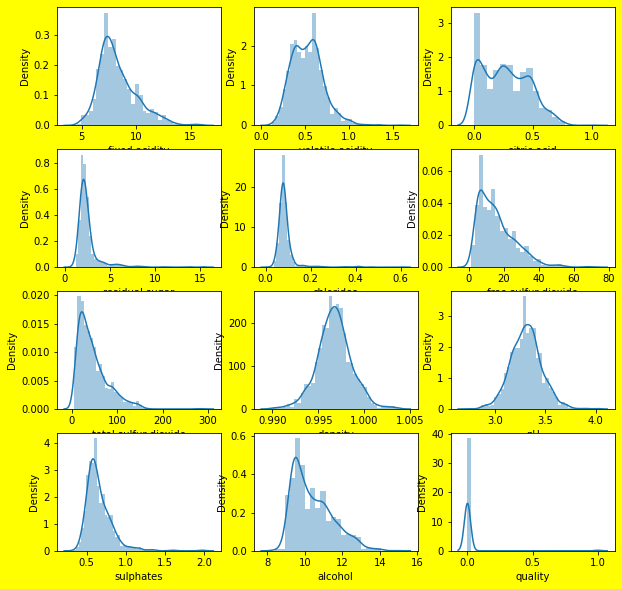

In [ ]:
plt.figure(figsize=(10,10),facecolor='yellow')
plotnumber=1
for i in df:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

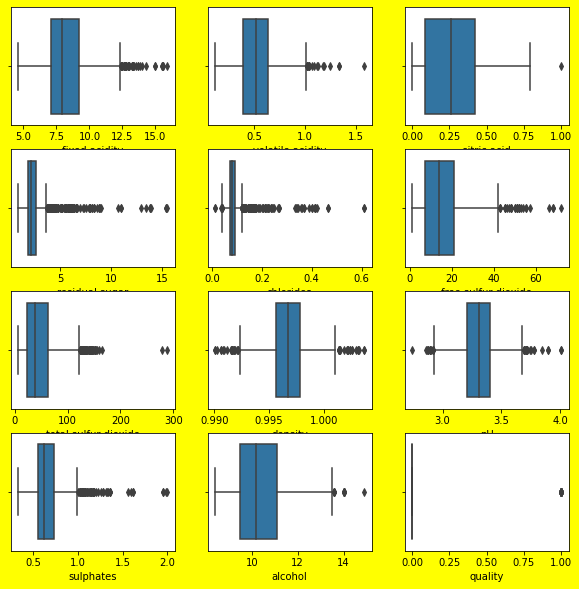

In [ ]:
plt.figure(figsize=(10,10),facecolor='yellow')
plotnumber=1
for i in df:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[i],)
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:

x=df.drop('quality',axis=1)
x.shape


(1599, 11)

In [ ]:

y=df.iloc[:,-1]
y.shape

(1599,)

In [ ]:
x.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


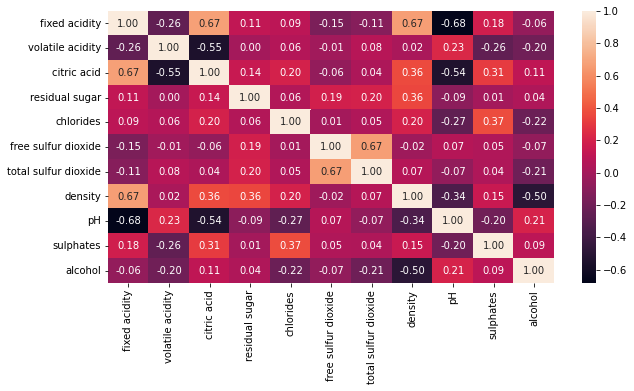

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(),annot=True,fmt='.2f')

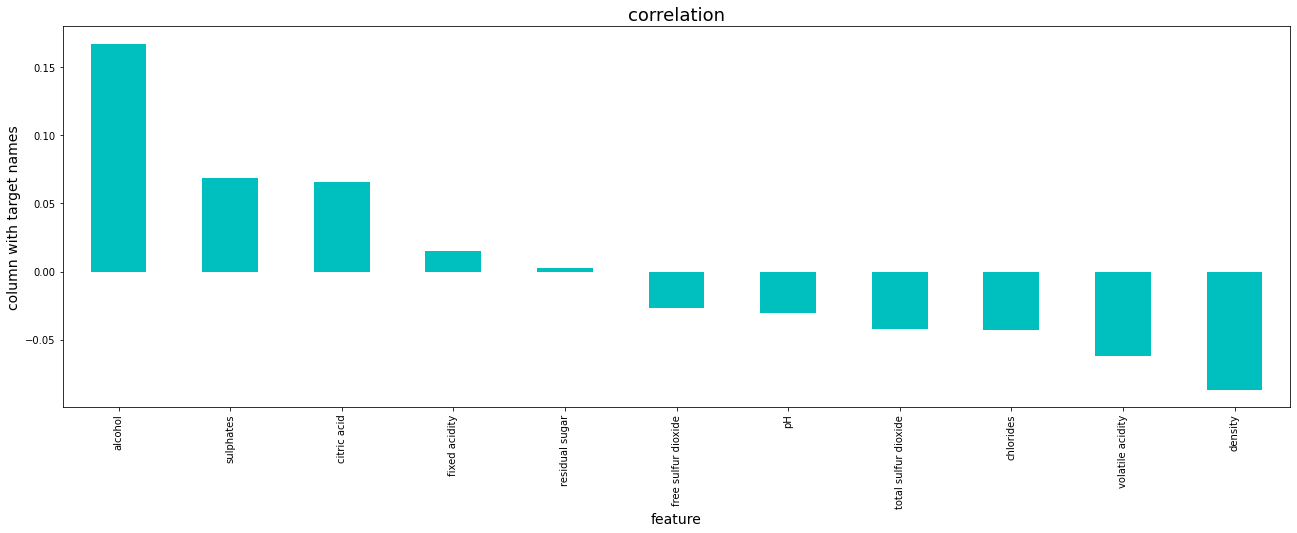

In [ ]:
plt.figure(figsize=(22,7))
df.corr()["quality"].sort_values(ascending=False).drop(["quality"]).plot(kind='bar',color="c")
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [ ]:
# detecting outliers
from scipy.stats import zscore
z=np.abs(zscore(x))

In [ ]:
z.shape

(1599, 11)

In [ ]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [ ]:

df1=z[(z<3).all(axis=1)]
df1.shape

(1458, 11)

In [ ]:
y=y[(z<3).all(axis=1)]
y.shape

(1458,)

In [ ]:

loss= (1599-1458)/1599*100
print(loss)

8.818011257035648


In [ ]:
df1.shape

(1458, 11)

In [ ]:
y.shape

(1458,)

In [ ]:
df1.skew()

fixed acidity           1.203408
volatile acidity        1.014469
citric acid             0.283534
residual sugar          2.904626
chlorides               3.327541
free sulfur dioxide     0.952578
total sulfur dioxide    1.434872
density                 1.069918
pH                      1.028638
sulphates               1.313008
alcohol                 1.073135
dtype: float64

In [ ]:
from sklearn.preprocessing import power_transform
dfx=power_transform(df1,method="yeo-johnson")
dfx

array([[-0.22754607,  0.55372101,  1.07046628, ...,  1.09700058,
         0.12965192,  0.48239066],
       [-0.84534011,  1.76635085,  1.07046628, ...,  0.24246043,
        -1.33818955, -0.27251349],
       [-0.84534011,  1.04204292,  0.72254938, ..., -0.66418416,
        -1.71267719, -0.27251349],
       ...,
       [ 0.8936019 , -1.55794503, -0.1396251 , ...,  0.21489316,
         0.03650944, -0.37382402],
       [ 1.17796018, -0.01291204, -0.03745256, ...,  1.50567478,
        -0.6584772 , -1.29915938],
       [ 1.11114949,  0.93492347,  0.43026057, ..., -0.19749711,
        -1.90176734, -0.37382402]])

In [ ]:

pd.DataFrame(dfx,columns=df1.columns).skew().sort_values(ascending=True)

citric acid            -0.034249
alcohol                 0.007633
free sulfur dioxide     0.011236
total sulfur dioxide    0.017461
volatile acidity        0.029790
sulphates               0.034548
fixed acidity           0.039283
pH                      0.055545
residual sugar          0.066341
density                 0.070681
chlorides               0.097378
dtype: float64

In [ ]:
Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(dfx,i) for i in range(dfx.shape[1])]
Vif['features']=x.columns
Vif

,Vif,features
0,1.542153,fixed acidity
1,1.041635,volatile acidity
2,1.203864,citric acid
3,1.039378,residual sugar
4,1.089170,chlorides
5,1.078287,free sulfur dioxide
6,1.070027,total sulfur dioxide
7,1.202249,density
8,1.222181,pH
9,1.042282,sulphates


In [ ]:
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(dfx) 
x=x_scaled
x

array([[0.39544097, 0.56715465, 0.61146085, ..., 0.70716569, 0.43595368,
        0.52613533],
       [0.25145321, 0.84674451, 0.61146085, ..., 0.50067762, 0.12094687,
        0.36482586],
       [0.25145321, 0.67974454, 0.53784427, ..., 0.28159922, 0.04057978,
        0.36482586],
       ...,
       [0.65674422, 0.08027861, 0.35541469, ..., 0.49401636, 0.41596479,
        0.34317761],
       [0.72301891, 0.43650897, 0.37703362, ..., 0.80591629, 0.26681686,
        0.14545005],
       [0.70744751, 0.65504655, 0.47599817, ..., 0.39436783, 0.        ,
        0.34317761]])

In [ ]:
# import sklearn
# sklearn.__version__


In [ ]:
# import numpy
# numpy.__version__

In [ ]:
# !pip install -U imbalanced-learn

In [ ]:
# from imblearn.over_sampling import SMOTE 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=29)

In [ ]:
mnb= GaussianNB()
mnb

GaussianNB()

In [ ]:
mnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=mnb.predict(x_test)


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9835616438356164

In [ ]:
# confusion matrix

In [ ]:
con_mat= confusion_matrix(y_test,y_pred)
con_mat



array([[359,   0],
       [  6,   0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       359
           1       0.00      0.00      0.00         6

    accuracy                           0.98       365
   macro avg       0.49      0.50      0.50       365
weighted avg       0.97      0.98      0.98       365



In [ ]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred)



In [ ]:
print("thresholds=",thresholds)
print("true positive rate=",tpr)
print("false positive rate=",fpr)




thresholds= [1 0]
true positive rate= [0. 1.]
false positive rate= [0. 1.]


In [ ]:
# plt.plot(fpr,tpr,color="Orange",label="roc")
# plt.plot([0,1],[0,1],color="skyblue",linestyle="-")
# plt.xlabel("false positive rate")
# plt.ylabel("true positive rate")
# plt.title("receiver(roc)curve")
# plt.legend()
# plt.show()



In [ ]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.5

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(x_train,y_train)

0.9908508691674291

In [ ]:
knn_pred=knn.predict(x_test)
knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred=dtc.predict(x_test)
dtc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
dtc_pred.score(x_train,y_train)

NameError: ignored

In [ ]:
cross_val= cross_val_score(dtc,x,y,cv=5)
print(cross_val)
print(cross_val.mean)
print(cross_val.std())

[0.97945205 0.96575342 0.98287671 0.98281787 0.98281787]
<built-in method mean of numpy.ndarray object at 0x7fbb8a4f4330>
0.0066261379957000335


In [ ]:
cross_val= cross_val_score(knn,x,y,cv=5)
cross_val

array([0.98972603, 0.98972603, 0.98630137, 0.98969072, 0.98969072])

In [6]:
df=pd.DataFrame(knn_pred)
df.to_csv("Red Wine Quality Prediction")

NameError: ignored